# 3.7 Exercises

This notebook file is intended to be a translation of the exercises included in Chapter 3 of Introduction to Statisical Learning


## Installation
There are multiple ways to get a notebook environment working. The easiest is probably to install Anaconda and work off of that premade setup.

However, I personally recommend using ASDF to install versions of Python and using Poetry to manage package dependencies. This is because I tend to use separate environments for each project I'm working on (including this one) and I previously had problems with `conda` installs.

Please look at the README.md in the base of the repository to see how to install things.


## Import necessary libraries

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols


### Problem Number 8

We are looking at the `Auto` data set and want to perform simple lienar regression.

In [2]:
auto_dataframe_path = '../data/Auto.csv' # filepath location of the dataset
cols = list(pd.read_csv(auto_dataframe_path, nrows=1)) # get column names of the dataset and put in list
auto_dataframe = pd.read_csv(auto_dataframe_path, usecols = [i for i in cols if i!= "Unnamed: 0"]) # remove the Index column that is used by R
auto_dataframe.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


(a) The book says to use the `lm()` function to fit a simple linear regression model on `horsepower` to predict `mpg`.

An analog for this would be the `OLS` function inside the `statsmodels.api` module

In [3]:
?sm.OLS

Init signature: sm.OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)
Docstring:     
Ordinary Least Squares

Parameters
----------
endog : array_like
    A 1-d endogenous response variable. The dependent variable.
exog : array_like
    A nobs x k array where `nobs` is the number of observations and `k`
    is the number of regressors. An intercept is not included by default
    and should be added by the user. See
    :func:`statsmodels.tools.add_constant`.
missing : str
    Available options are 'none', 'drop', and 'raise'. If 'none', no nan
    checking is done. If 'drop', any observations with nans are dropped.
    If 'raise', an error is raised. Default is 'none'.
hasconst : None or bool
    Indicates whether the RHS includes a user-supplied constant. If True,
    a constant is not checked for and k_constant is set to 1 and all
    result statistics are calculated as if a constant is present. If
    False, a constant is not checked for and k_constant is set to 0.
**kwa

In [4]:
X = auto_dataframe['horsepower']
Y = auto_dataframe['mpg']

model = sm.OLS(Y, X)
results = model.fit()

results.params

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [5]:
auto_dataframe['horsepower'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 397 entries, 0 to 396
Series name: horsepower
Non-Null Count  Dtype 
--------------  ----- 
397 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [6]:
# Oh right, this error: missing data in the horsepower column is filled with '?' so we have to remove the entries with a '?'
cleaned = auto_dataframe[auto_dataframe['horsepower'] != '?']
cleaned['horsepower'] = cleaned['horsepower'].astype('int64')
cleaned.head()

/tmp/ipykernel_5255/3657243183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['horsepower'] = cleaned['horsepower'].astype('int64')


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [7]:
cleaned.shape

(392, 9)

In [33]:
X = sm.add_constant(cleaned['horsepower'])
Y = cleaned['mpg']

model = sm.OLS(Y, X)
results = model.fit()

results.params

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 23 Apr 2022   Prob (F-statistic):           7.03e-81
Time:                        11:50:01   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

Use the `pandas.DataFrame.describe()` to print the results. Comment on the output. 

In [9]:
cleaned.describe()
# this is just a description of the dataframe itself, but it seems like the problem is actually asking about the resulting regression

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [10]:
results.tvalues

const         55.659841
horsepower   -24.489135
dtype: float64

In [11]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 23 Apr 2022   Prob (F-statistic):           7.03e-81
Time:                        11:38:27   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For example:

8. (a) i. Is there a relationship between the predictor (`horsepower`) and the response (`mpg`)?

In looking at the slope coefficient for horsepower, it says -0.1578, which means that for every unit increase in horsepower, we can expect decrease in mpg by 0.1788

8. (a) ii. How strong is the relationship between the predictor and the response?

So the $R^{2}$ is 0.606, depending on field of interest, this could be considered a good $R^{2}$ but I don't think it is strong here.

8. (a) iii. Is the relationship between the predictor and the response positive or negative?

It is negative as indicated by the coefficient being positive

1. (a) iv. What is the predicted `mpg` associated with a `horsepower` of 98? What are the associated 95% confidence and prediction intervals?

In [12]:
X[0:4]

,const,horsepower
0,1.0,130
1,1.0,165
2,1.0,150
3,1.0,150


In [13]:
model.predict(params=results.params, exog=[1, 98])

24.46707715251243

Predicted MPG is 24.5 mpg for 98 horsepower

In [14]:
results.conf_int(alpha=0.05)
# This is the confidence interval around the slope and not around the prediction, so I think this is incorrect

,0,1
const,38.525212,41.346510
horsepower,-0.170517,-0.145172


In [ ]:
results.get_prediction(exog=[1,98]).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


8. (b) Plot the response and the predictor. Use the `matplotlib.pyplot.plot` function to make a line/scatter plot. Will need to save the results and call the intercept and slope. Aftewards, use the x values to calculate predictions and plot with matplotlib (can store in the same dataframe)


We are trying to overlay a line plot (the regression) on a scatter plot (the observations)

In [15]:
cleaned['horsepower']

0      130
1      165
2      150
3      150
4      140
      ... 
392     86
393     52
394     84
395     79
396     82
Name: horsepower, Length: 392, dtype: int64

In [16]:
cleaned['horsepower'].T

0      130
1      165
2      150
3      150
4      140
      ... 
392     86
393     52
394     84
395     79
396     82
Name: horsepower, Length: 392, dtype: int64

In [17]:
np.reshape(cleaned['horsepower'],( -1)).shape

(392,)

In [18]:
np.atleast_2d(cleaned['horsepower']).T.shape

(392, 1)

In [19]:
predicted = model.predict(params=results.params, exog=X)
predicted.shape

(392,)

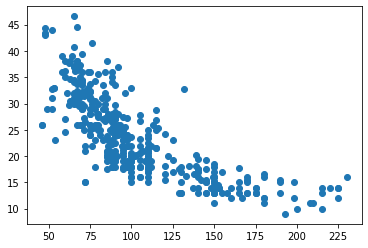

In [20]:
plt.scatter(X['horsepower'], Y);

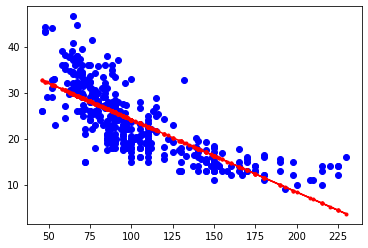

In [21]:
plt.scatter(X['horsepower'], Y, c='blue')
plt.plot(X['horsepower'], predicted, c='red', marker='.');

8. (c) Use the `plot()` function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

May need to come back and correct the function call. 
I think you are supposed to compare the observational data with your predictions on a scatter plot

In [34]:
# Refactor to use formula API, which looks more like R: https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html
model = ols("mpg ~ horsepower", data=cleaned).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 23 Apr 2022   Prob (F-statistic):           7.03e-81
Time:                        11:51:48   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

eval_env: 1


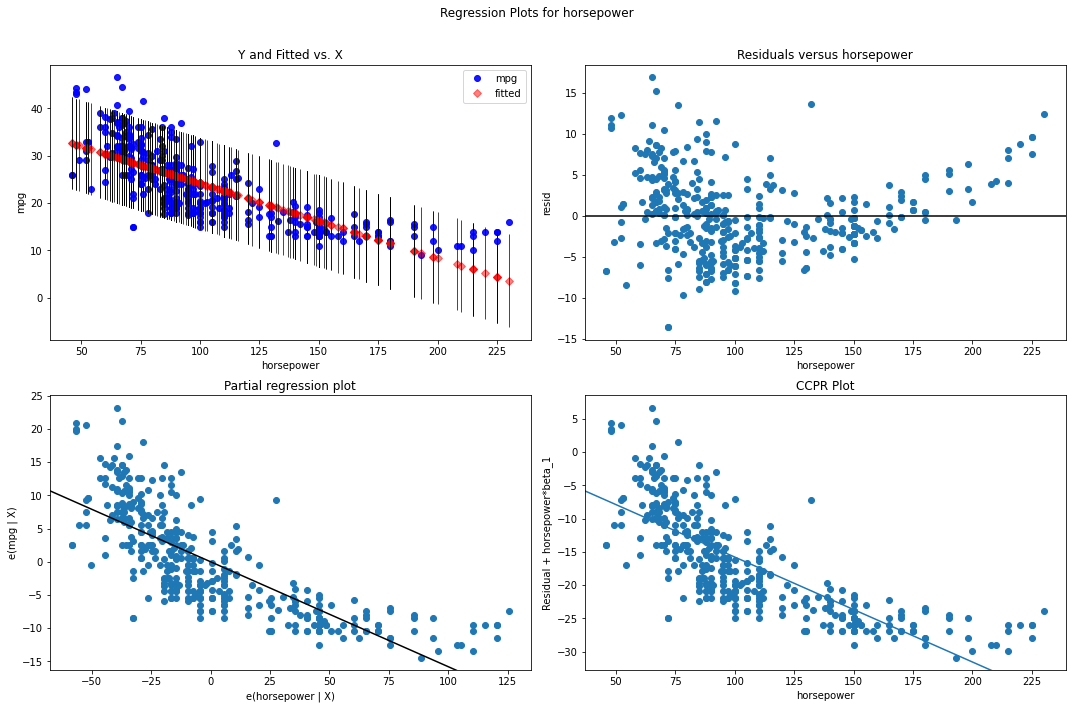

In [37]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, 'horsepower', fig=fig)

### Problem 9

This question involves the use of multiple linear regression on the `Auto` data.

9. (a) Produce a scatterplot matrix which includes all of the variables in the data set.

Check function calls

In [22]:
cleaned_without_targets = cleaned.drop(['mpg', 'name'], axis=1)

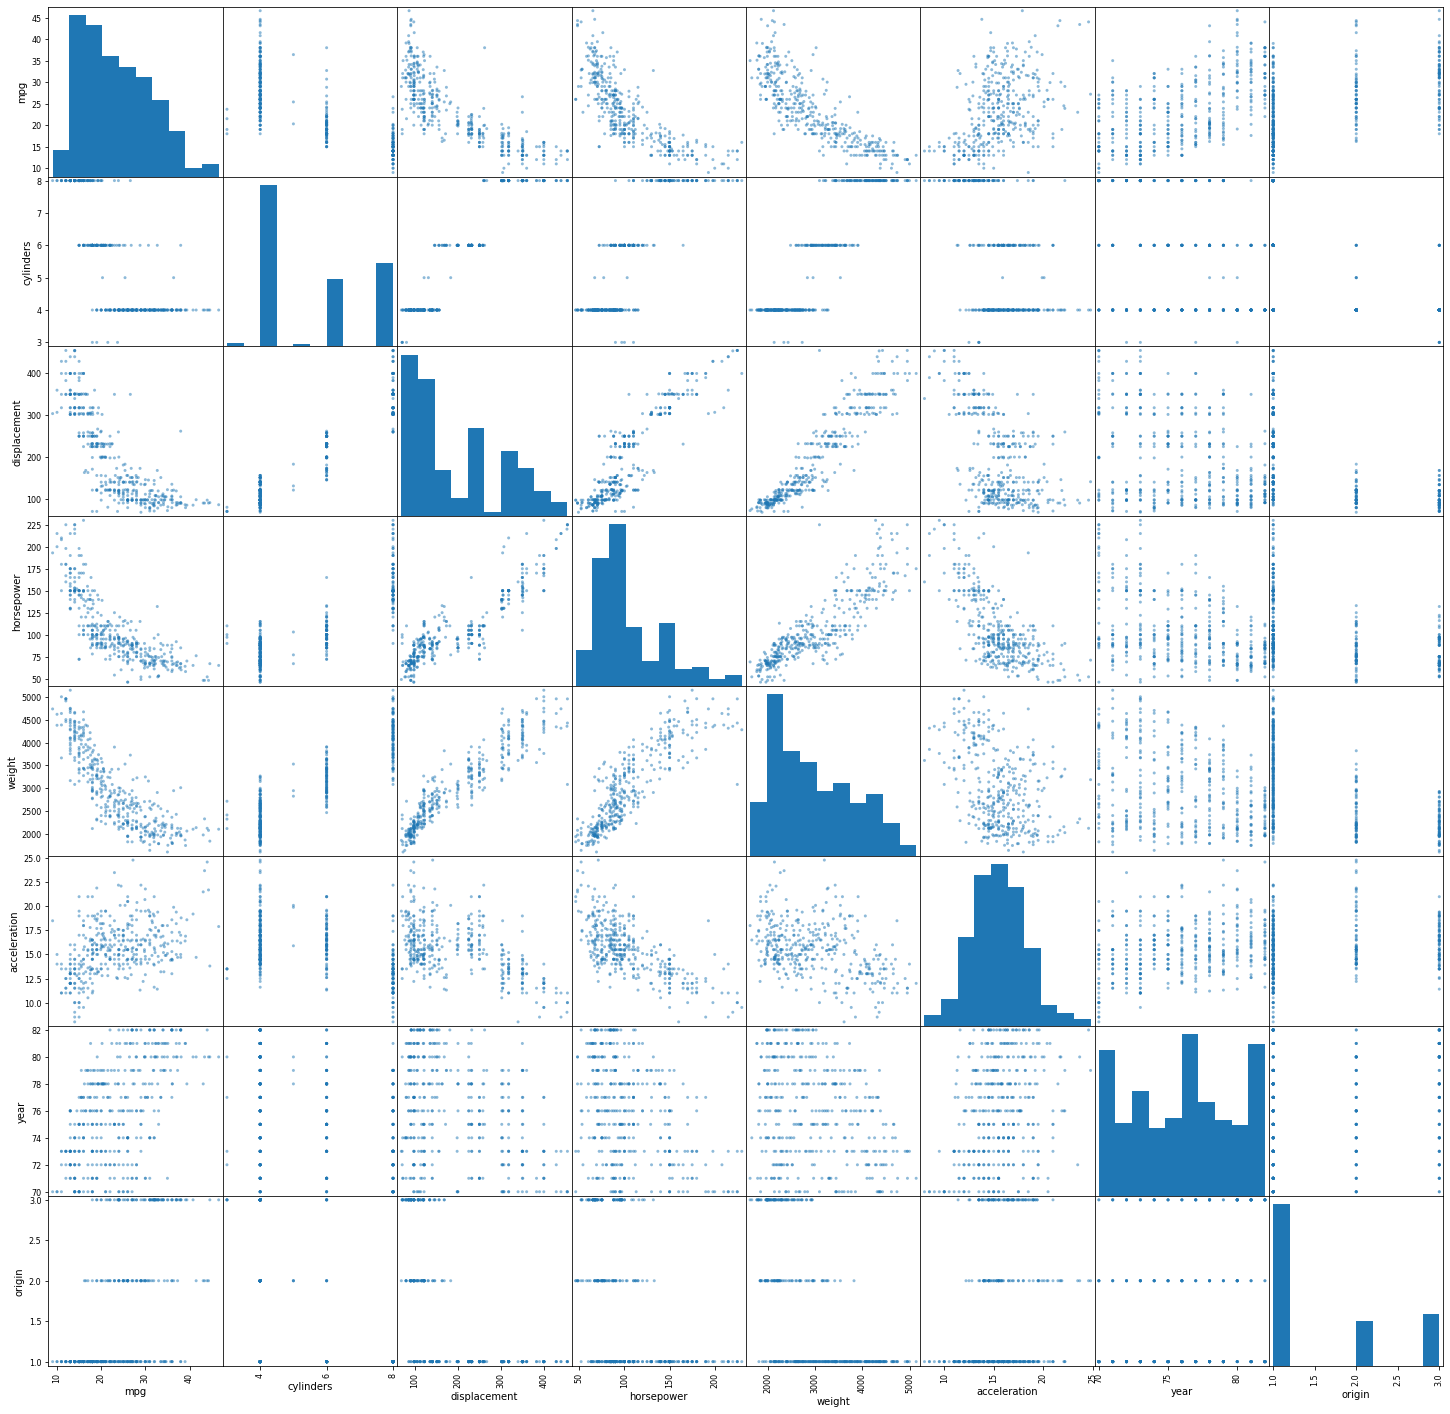

In [23]:
pd.plotting.scatter_matrix(cleaned, figsize=(25,25));

9. (b) Compute the matrix of correlations between the variables using the function `pd.DataFrame.corr()`. You will need to exclude the `name` variable, which is qualitative

Go back and check the function calls

In [24]:
cleaned_without_targets.corr()

,cylinders,displacement,horsepower,weight,acceleration,year,origin
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


9. (c) Use the `sm.OLS` function to perform a multiple linear regression with `mpg` as the response and all other variables except `name` as the predictors. 

In [38]:
multi_X = sm.add_constant(cleaned_without_targets)
Y = cleaned['mpg']

multi_model = sm.OLS(Y, multi_X)
multi_results = multi_model.fit()

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 23 Apr 2022   Prob (F-statistic):          2.04e-139
Time:                        11:53:46   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

Use the `pd.DataFrame.describe()` function to print the results. Comment on the output. 

In [26]:
multi_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 23 Apr 2022   Prob (F-statistic):          2.04e-139
Time:                        11:39:15   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
multi_model = ols("mpg ~ horsepower + cylinders + displacement + weight + acceleration + year + origin", data=cleaned).fit()
print(multi_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 23 Apr 2022   Prob (F-statistic):          2.04e-139
Time:                        11:54:20   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

In [27]:
cleaned['cylinders'].value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

$R^2$ is better, but that makes sense since $R^2$ tends to go up with more variables. 

(c) i. Is there a relationship between the predictors and the response?

We can see maybe weak coefficients relating the predictors to the response, but we did not standardize the predictors or convert some data to categorical values, so that may affect the regression.

(c) ii. Which predictors appear to have a statistically significant relationship to the response?

It looks like the constant, displacement, weight, year, and origin are all statistically significant, but year and origin, as well as cylinders should probably get converted to categorical, and that may affect the regression

(c) iii. What does the coefficient for the `year` variable suggest?

Newer cars have better mpg

(d) Use the `plot()` function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. 

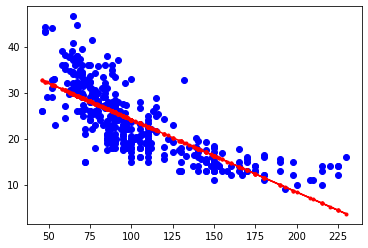

In [28]:
multi_predicted = multi_model.predict(params=multi_results.params, exog=multi_X)
plt.scatter(X['horsepower'], Y, c='blue')
plt.plot(X['horsepower'], predicted, c='red', marker='.');


Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

May not have as easy access to residual or leverage plots...

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


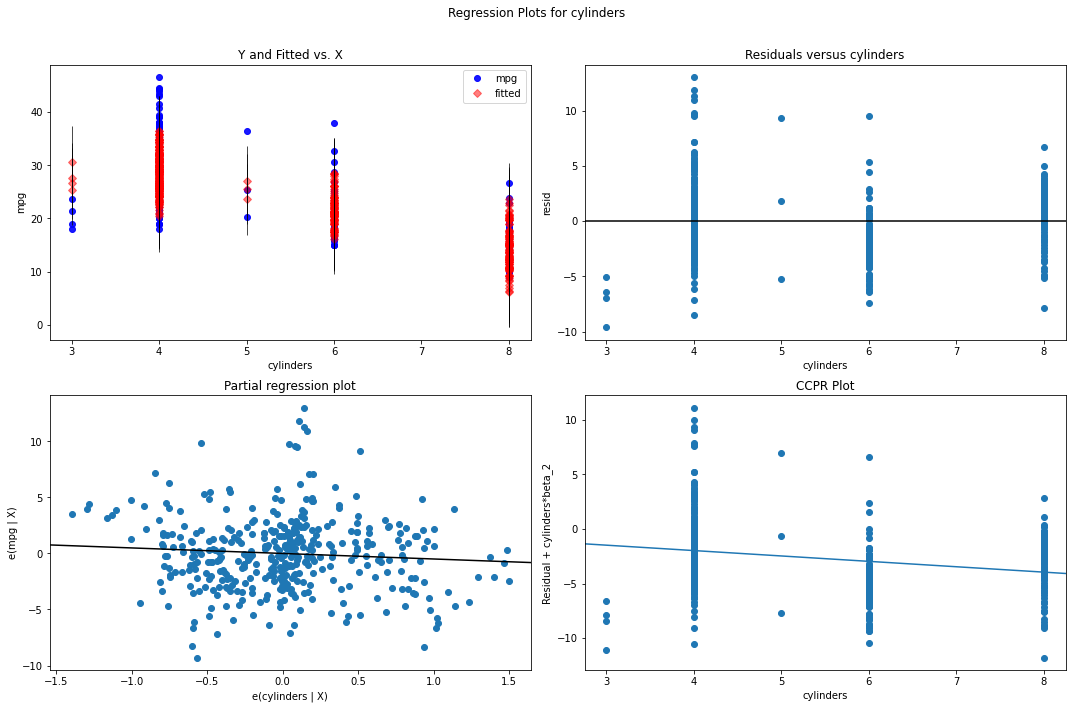

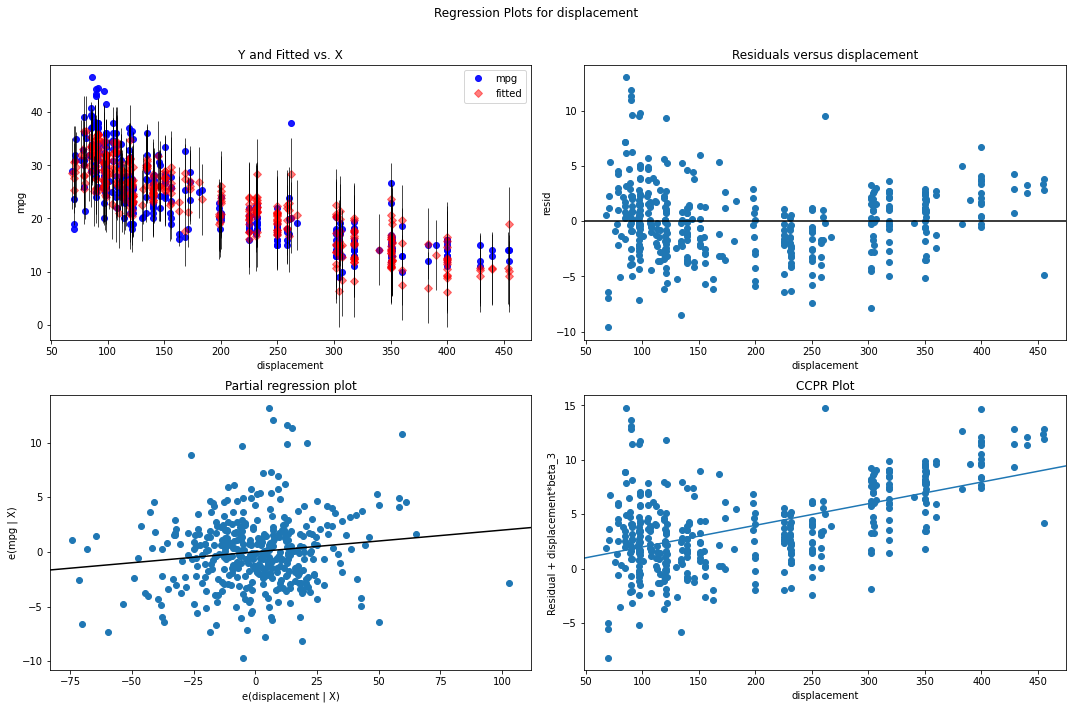

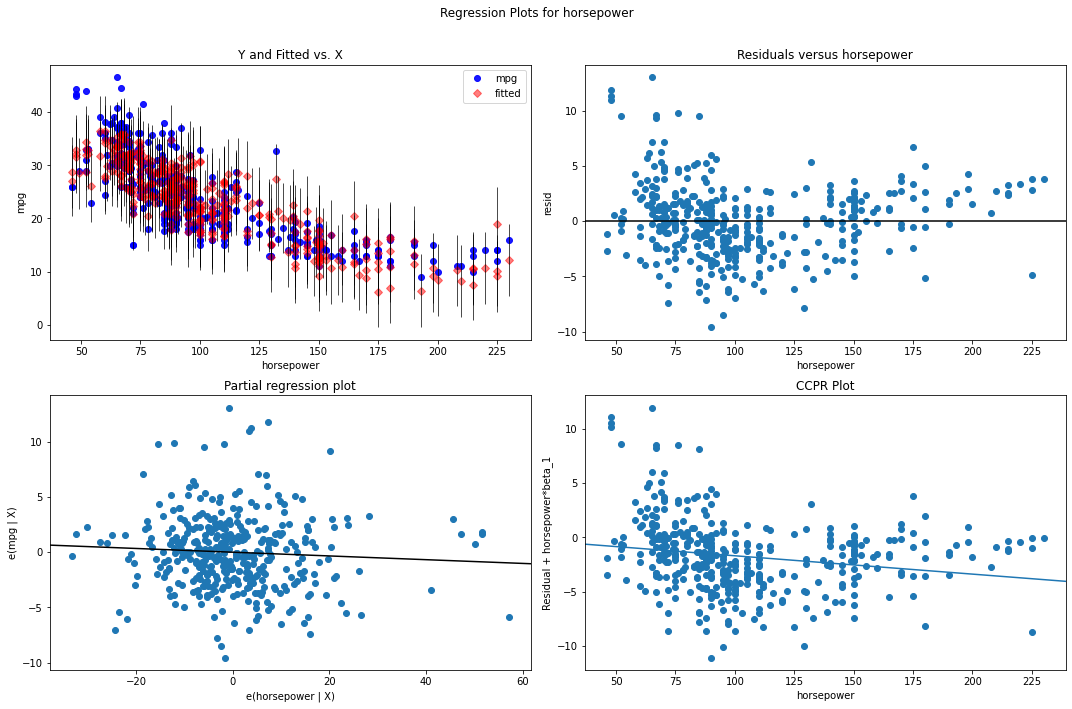

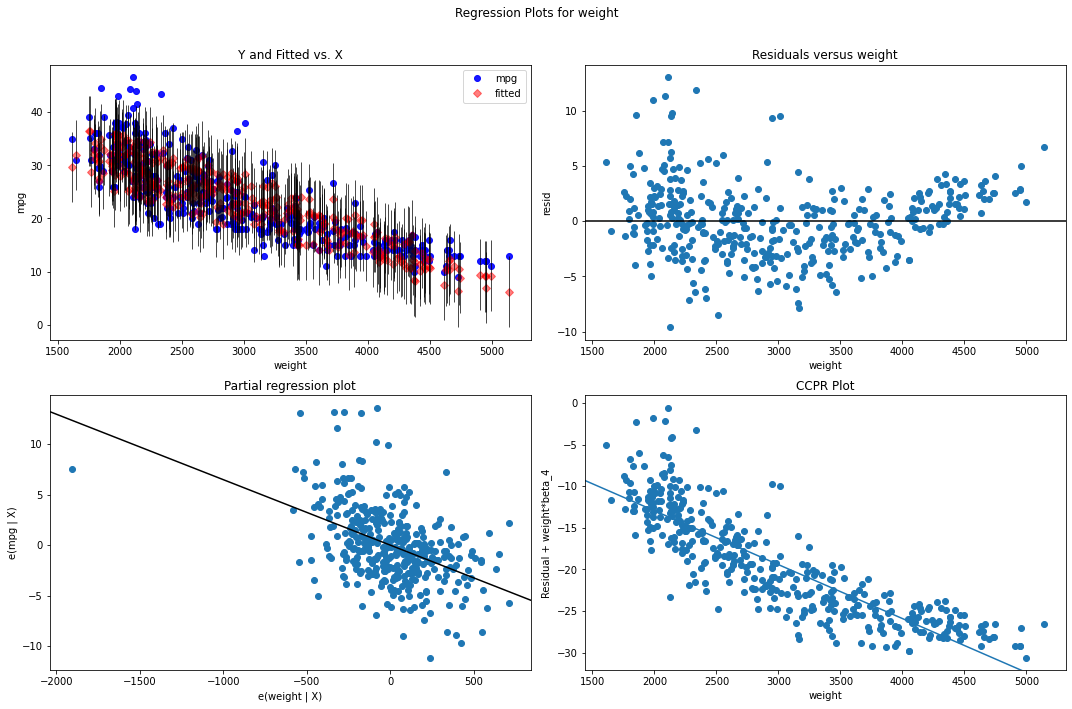

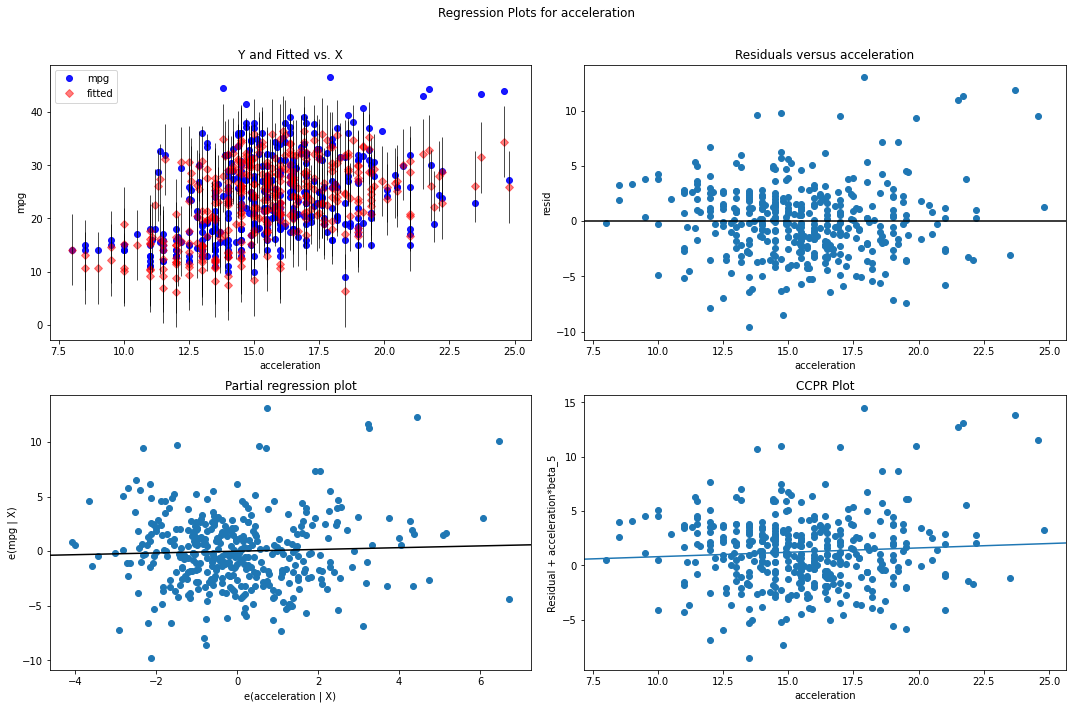

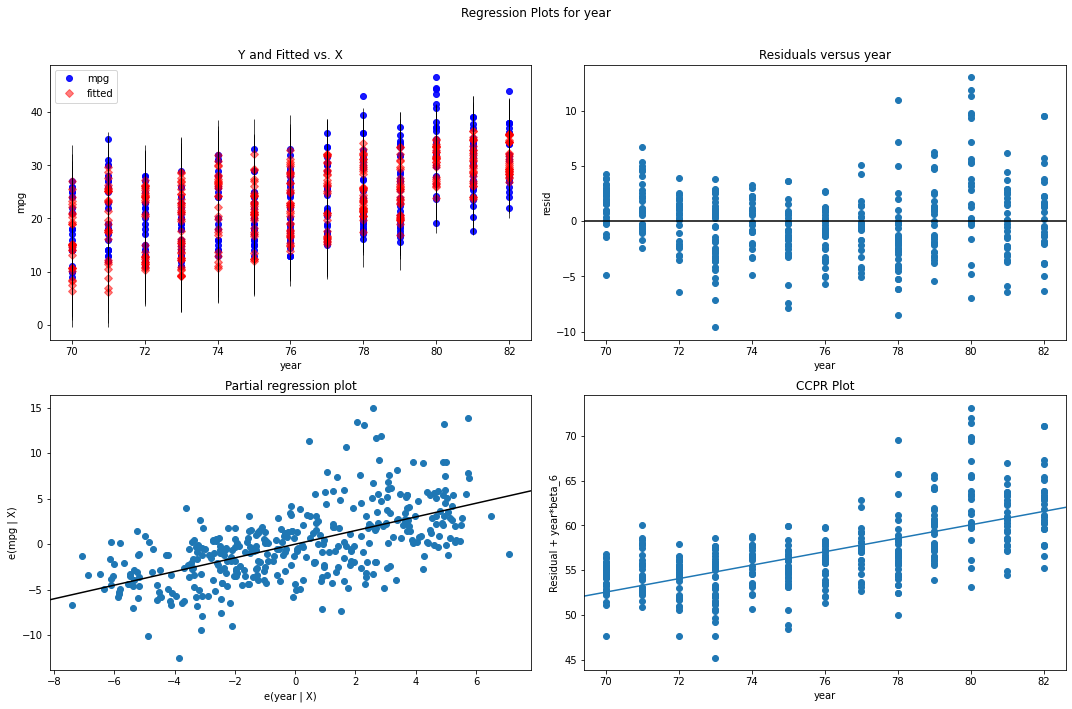

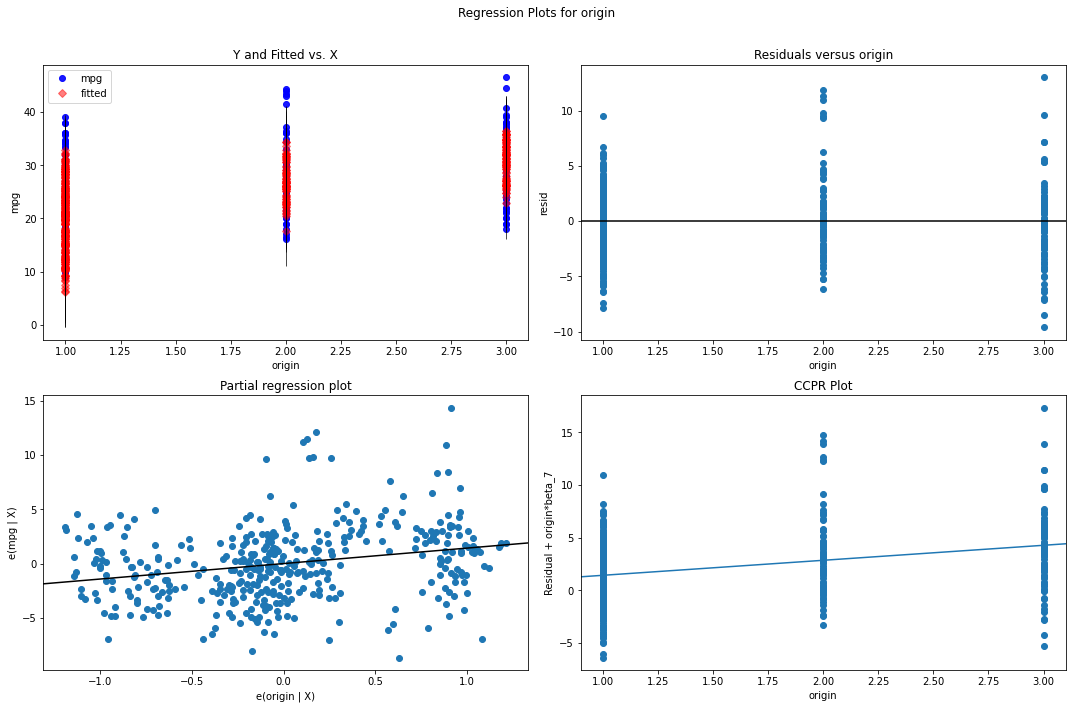

In [48]:
for col in cleaned_without_targets.columns.tolist():
    fig = plt.figure(figsize=(15,10));
    fig = sm.graphics.plot_regress_exog(multi_model, col, fig=fig);

(e) Use the `*` and `:` symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?


Need to figure out what these R operators are...

`*` might just be multiply and `:` seems to be a sequence generator

In [52]:
# https://stackoverflow.com/questions/33050104/difference-between-the-interaction-and-term-for-formulas-in-statsmodels-ols

interact_model_1 = ols("mpg ~ horsepower * cylinders + displacement + weight + acceleration + year + origin ", data=cleaned).fit()

print(interact_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     299.3
Date:                Sat, 23 Apr 2022   Prob (F-statistic):          1.33e-159
Time:                        12:06:17   Log-Likelihood:                -972.89
No. Observations:                 392   AIC:                             1964.
Df Residuals:                     383   BIC:                             2000.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               11.7025 

(f) Try a few different transformations of the variables, such as $log(X)$ (`np.log()`), $\sqrt{X}$ (`np.sqrt()`), and $X^2$ (`np.power()`). Comment on your findings

In [53]:
# Since this is play time with the data/EDA isn't immediately clear if there is a 'solution' so feel free to make transformations and comment on effects as you'd like

# I would actually first transform some of the variables to categorical (like origin, cylinders, maybe year), and also scale the actual numerical values

# Steps
# 1. Use sklearn StandardScaler to scale the numerical columns (horsepower, displacement, acceleration)
# 2. Use sklearn OrdinalEncoder for categorical and order columns cylinder, year
# 3. Use sklearn OneHotEncoder for categorical column origin
from sklearn.preprocessing import StandardScaler


cleaned.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [54]:
cleaned_without_targets.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1


In [55]:
cleaned_without_targets['year'].describe()

count    392.000000
mean      75.979592
std        3.683737
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: year, dtype: float64

In [56]:
cleaned_without_targets['year'].value_counts()

73    40
78    36
76    34
75    30
82    30
70    29
79    29
72    28
77    28
81    28
71    27
80    27
74    26
Name: year, dtype: int64

In [57]:
cleaned_without_targets['year'].value_counts().shape

(13,)

In [60]:
cleaned[cleaned['origin'] == 2]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
19,26.0,4,97.0,46,1835,20.5,70,2,volkswagen 1131 deluxe sedan
20,25.0,4,110.0,87,2672,17.5,70,2,peugeot 504
21,24.0,4,107.0,90,2430,14.5,70,2,audi 100 ls
22,25.0,4,104.0,95,2375,17.5,70,2,saab 99e
23,26.0,4,121.0,113,2234,12.5,70,2,bmw 2002
...,...,...,...,...,...,...,...,...,...
353,33.0,4,105.0,74,2190,14.2,81,2,volkswagen jetta
359,28.1,4,141.0,80,3230,20.4,81,2,peugeot 505s turbo diesel
360,30.7,6,145.0,76,3160,19.6,81,2,volvo diesel
374,36.0,4,105.0,74,1980,15.3,82,2,volkswagen rabbit l


In [61]:
cleaned[cleaned['origin'] == 3]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
14,24.0,4,113.0,95,2372,15.0,70,3,toyota corona mark ii
18,27.0,4,97.0,88,2130,14.5,70,3,datsun pl510
29,27.0,4,97.0,88,2130,14.5,71,3,datsun pl510
31,25.0,4,113.0,95,2228,14.0,71,3,toyota corona
53,31.0,4,71.0,65,1773,19.0,71,3,toyota corolla 1200
...,...,...,...,...,...,...,...,...,...
381,34.0,4,108.0,70,2245,16.9,82,3,toyota corolla
382,38.0,4,91.0,67,1965,15.0,82,3,honda civic
383,32.0,4,91.0,67,1965,15.7,82,3,honda civic (auto)
384,38.0,4,91.0,67,1995,16.2,82,3,datsun 310 gx


In [64]:
len(set(cleaned['name'].tolist()))

301

In [ ]:
# cylinders, year, and origin are categorical


### Problem 10

This question uses the `Carseats` data set.

(a) Fit a multiple regression model to predict `Sales` using `Price`, `Urban`, and `US`

(b) Provide an interpretation of each coefficient in the model. Be careful! Some of the variables in the model are qualitative!

(c) Write out the model in equation form, being careful to handle the qualtitative variables properly.

(d) For which of the predictors can you reject the null hypothesis $H_{0}$: $β_{j}$ = 0 ?

(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

(f) How well do the models in (a) and (e) fit the data?

(g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s)

(h) Is there evidence of outliers or high leverage observations in the model from (e)?

### Problem 11

In this problem we will investigate the *t*-statistic for the null hypothesis $H_{0}$ : $β$ = 0 in simple linear regression without an intercept. To
begin, we generate a predictor `x` and a response `y` as follows.

In [6]:
np.random.seed(200)
x1_np = np.random.standard_normal(size=100)

y1_np = 2 * x1_np + np.random.standard_normal(size=100)

False


(a) Perform a simple linear regression of `y` onto `x`, *without* an intercept. Report the coefficient estimate $\hat{β}$, the standard error of
this coefficient estimate, and the *t*-statistic and *p*-value associated with the null hypothesis *$H_{0}$* : *β* = 0. Comment on these
results. (You can perform regression without an intercept using
the command `sm.OLS`)

In [ ]:
# Hint: use sm.OLS(), and you will have to set the first element of y to be z

(b) Now perform a simple linear regression of `x` onto `y` without an
intercept, and report the coefficient estimate, its standard error,
and the corresponding *t*-statistic and *p*-values associated with
the null hypothesis $H_{0}$ : $β$ = 0. Comment on these results.

(c) What is the relationship between the results obtained in (a) and
(b)?

(d) For the regression of *Y* onto *X* without an intercept, the tstatistic for $H_{0}$ : $β$ = 0 takes the form $\hatβ/SE(\hatβ)$, where $\hatβ$ is
given by (3.38), and where

\begin{gather*}
SE(\hat{β}) = \sqrt{ \frac{\sum_{i=1}^{n} (y_{i} - x_{i}\hat{β})^2}{(n-1)\sum_{i'=1}^{n} x_{i'}^2}}.
\end{gather*}


(These formulas are slightly different from those given in Sections 3.1.1 and 3.1.2, since here we are performing regression
without an intercept.) Show algebraically, and confirm numerically in `Python`, that the *t*-statistic can be written as

\begin{gather*}
\frac{(\sqrt{n-1})\sum_{i=1}^{n} x_{i}y_{i}}{\sqrt{ (\sum_{i=1}^{n} x_{i}^2)(\sum_{i'=1}^{n} y_{i}^2) - (\sum_{i'=1}^{n}x_{i'}y_{i'})^2 }}.
\end{gather*}

(e) Using the results from (d), argue that the *t*-statistic for the regression of `y` onto `x` is the same as the *t*-statistic for the regression
of `x` onto `y`.

(f) In Python, show that when regression is performed *with* an intercept,
the *t*-statistic for $H_{0}$ : $β_{1}$ = 0 is the same for the regression of `y` onto `x` as it is for the regression of `x` onto `y`.

### Problem 12

This problem involves simple linear regression without an intercept.

(a) Recall that the coefficient estimate $\hatβ$ for the linear regression of
$Y$ onto $X$ without an intercept is given by (3.38). Under what
circumstance is the coefficient estimate for the regression of $X$
onto $Y$ the same as the coefficient estimate for the regression of
$Y$ onto $X$ ?

(b) Generate an example in `Python` with *n* = 100 observations in which
the coefficient estimate for the regression of *X* onto *Y* is *different
from* the coefficient estimate for the regression of *Y* onto *X*.

(c) Generate an example in `Python` with *n* = 100 observations in which
the coefficient estimate for the regression of *X* onto *Y* is *the
same* as the coefficient estimate for the regression of *Y* onto *X*.

### Problem 13

In this exercise you will create some simulated data and will fit simple
linear regression models to it. Make sure to use `set.seed(1)` prior to
starting part (a) to ensure consistent results.

1.  (a) Using the `np.random.standard_normal()` function, create a vector, `x`, containing 100 observations drawn from a $N(0, 1)$ distribution. This represents
a feature, *X*.

1.  (b) Using the `np.random.normal()` function, create a vector, `eps`, containing 100 observations drawn from a $N(0, 0.25)$ distribution—a normal
distribution with mean zero and variance 0.25.

13. (c) Using `x` and `eps`, generate a vector `y` according to the model

\begin{gather*}
Y = −1+0.5X + ϵ.                                        (3.39)
\end{gather*}
What is the length of the vector `y`? What are the values of $β_{0}$
and $β_{1}$ in this linear model?

13. (d) Create a scatterplot displaying the relationship between `x` and
`y`. Comment on what you observe.

13. (e) Fit a least squares linear model to predict `y` using `x`. Comment
on the model obtained. How do $\hatβ_{0}$ and $\hatβ_{1}$ compare to $β_{0}$ and
$β_{1}$?

13. (f) Display the least squares line on the scatterplot obtained in (d).
Draw the population regression line on the plot, in a different
color. Use the `pandas.DataFrame.plot(legend=True)` command to create an appropriate legend.

13. (g) Now fit a polynomial regression model that predicts `y` using `x`
and $x^2$. Is there evidence that the quadratic term improves the
model fit? Explain your answer.

Find out mix superscript with code formatting style

13. (h) Repeat (a)–(f) after modifying the data generation process in
such a way that there is less noise in the data. The model (3.39)
should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term
$ϵ$ in (b). Describe your results.

13. (i) Repeat (a)–(f) after modifying the data generation process in
such a way that there is more noise in the data. The model
(3.39) should remain the same. You can do this by increasing
the variance of the normal distribution used to generate the
error term ϵ in (b). Describe your results.

13. (j) What are the confidence intervals for $β_{0}$ and $β_{1}$ based on the
original data set, the noisier data set, and the less noisy data
set? Comment on your results.

### Problem 14
This problem focuses on the collinearity problem

14. (a) Perform the following commands in Python with scipy and numpy:
> np.random.seed(200) 
> 
> x1 = np.random.uniform()
> 
> x2 = 0.5 * x1 + np.random.normal(100) / 10
> 
> y = 2 + 2 * x1 + 0.3 * x2 + np.random.normal(100)


The last line corresponds to creating a linear model in which y is
a function of x1 and x2. Write out the form of the linear model.
What are the regression coefficients?

14. (b) What is the correlation between x1 and x2? Create a scatterplot
displaying the relationship between the variables.

14. (c) Using this data, fit a least squares regression to predict y using
x1 and x2. Describe the results obtained. What are βˆ0, βˆ1, and
βˆ2? How do these relate to the true $β_{0}$, $β_{1}$, and $β_{2}$? Can you
reject the null hypothesis $H_{0}$ : $β_{1}$ = 0? How about the null
hypothesis $H_{0}$ : $β_{2}$ = 0?

14. (d) Now fit a least squares regression to predict y using only x1.
Comment on your results. Can you reject the null hypothesis
$H_{0}$ : $β_{1}$ = 0?

14. (e) Now fit a least squares regression to predict y using only x2.
Comment on your results. Can you reject the null hypothesis
$H_{0}$ : $β_{1}$ = 0?

14. (f) Do the results obtained in (c)–(e) contradict each other? Explain
your answer.

14. (g) Now suppose we obtain one additional observation, which was
unfortunately mismeasured.
> x1 = np.append(x1, 0.1)
> 
> x2 = np.append(x2, 0.8)
> 
> y = np.append(y, 6)


Re-fit the linear models from (c) to (e) using this new data. What
effect does this new observation have on the each of the models?
In each model, is this observation an outlier? A high-leverage
point? Both? Explain your answers.

### Problem 15

This problem involves the `Boston` data set, which we saw in the lab
for this chapter. We will now try to predict per capita crime rate
using the other variables in this data set. In other words, per capita
crime rate is the response, and the other variables are the predictors.

15. (a) For each predictor, fit a simple linear regression model to predict
the response. Describe your results. In which of the models is
there a statistically significant association between the predictor
and the response? Create some plots to back up your assertions.

15. (b) Fit a multiple regression model to predict the response using
all of the predictors. Describe your results. For which predictors
can we reject the null hypothesis $H_{0}$ : $β_{j}$ = 0?

15. (c) How do your results from (a) compare to your results from (b)?
Create a plot displaying the univariate regression coefficients
from (a) on the x-axis, and the multiple regression coefficients
from (b) on the y-axis. That is, each predictor is displayed as a
single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate
in the multiple linear regression model is shown on the y-axis.

15. (d) Is there evidence of non-linear association between any of the
predictors and the response? To answer this question, for each
predictor *X*, fit a model of the form

\begin{gather*}
Y = β_{0} + β_{1}X + β_{2}X^2 + β_{3}X^3 + ϵ
\end{gather*}